Yo yo this my file >:)

In [1]:
# imports 
import functions as fn 
import numpy as np
import pandas as pd 
import itertools
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

1 table -> overall
1 table -> variable specific

overall: 

- nb records
- nb features
- nb 

put distribution type in table??

important things: 

- descriptive table -> add: distribution type? correlation coefficient to Mood var?
- data distribution -> histograms/boxplots
- data patterns -> datetime plot
- data relationships -> correlation matrix?

Comments: 

- very larege number of unique time entries -> problematic for models
- big chunks of missing data for certain variables -> not 'Na' but just not recorded 
- ... 



In [2]:
df = fn.load_data()
df = fn.widen_data(df)
df

variable,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
0,AS14.01,2014-02-17 12:04:42.394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,AS14.01,2014-02-17 18:28:25.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,AS14.01,2014-02-18 09:29:51.257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,AS14.01,2014-02-19 14:43:30.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,AS14.01,2014-02-19 17:29:10.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358921,AS14.33,2014-05-30 22:32:05.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358922,AS14.33,2014-05-30 22:32:11.049,NaN,3.122,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358923,AS14.33,2014-05-30 22:32:14.240,NaN,1.003,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358924,AS14.33,2014-05-30 22:32:15.246,NaN,4.134,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# datatypes
types = ['id', 'datetime', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric','numeric', 'numeric','numeric','numeric','numeric', 'categorical', 'numeric', 'numeric', 'ordinal', 'numeric', 'categorical']

# nb of values 
n_values = [df[var].count() for var in df]

# nb of unique values
n_unique = [df[var].nunique() for var in df]

# mean + std ** is this correct? 
mean_std = []
for var in df: 
    if var != 'id' and var != 'time':
        mean = round(df[var].mean(), 2)
        std = round(df[var].std(), 2) 
        res = f'{mean} ({std})'
        mean_std.append(res)
mean_std.insert(0,'Na')
mean_std.insert(0,'Na')

# range of values
val_range = []
for var in df:
    if var != 'id':
        r = (df[var].min(), df[var].max())
        if var != 'time':
            r = (round(r[0]), round(r[1]))
        else:
            r = (df['time'].dt.date.min(), df['time'].dt.date.max())
        val_range.append(r)
        r = df['time'].dt.date
val_range.insert(0, 'Na')

# date range 
time_range = []
for var in df: 
    # if var != 'id':
    grouped = df.groupby(var)['time'].min()
    r = (grouped.dt.date.min(), grouped.dt.date.max())
    time_range.append(r)


# missing values before time aggregation
missing_before_agg = df.isna().sum().tolist()

# missing values after time aggregation
temp_df = fn.group_data(df)
missing_after_agg = temp_df.isna().sum().tolist()
missing_after_agg.insert(0, 0)


df1 = pd.DataFrame({'Variables': df.columns, 
                    'Data types': types, 
                    'number values': n_values, 
                    'number unique values': n_unique, 
                    'Mean (std)': mean_std,
                    'Value range': val_range,
                    'Date range': time_range, 
                    'Missing values (before time aggregation)': missing_before_agg,
                    'Missing values (after time aggregation)': missing_after_agg
                    })
df1


,Variables,Data types,number values,number unique values,Mean (std),Value range,Date range,Missing values (before time aggregation),Missing values (after time aggregation)
0,id,id,358926,27,Na,Na,"(2014-02-17, 2014-04-09)",0,0
1,time,datetime,358926,336907,Na,"(2014-02-17, 2014-06-09)","(2014-02-17, 2014-06-09)",0,0
2,activity,numeric,22965,1868,0.12 (0.19),"(0, 1)","(2014-03-17, 2014-06-07)",335961,0
3,appCat.builtin,numeric,91288,23237,18.54 (415.99),"(-82799, 33960)","(2014-03-13, 2014-06-08)",267638,0
4,appCat.communication,numeric,74276,39890,43.34 (128.91),"(0, 9831)","(2014-03-13, 2014-06-08)",284650,0
5,appCat.entertainment,numeric,27125,12575,37.58 (262.96),"(0, 32149)","(2014-03-13, 2014-06-02)",331801,0
6,appCat.finance,numeric,939,729,21.76 (39.22),"(0, 356)","(2014-03-15, 2014-05-09)",357987,0
7,appCat.game,numeric,813,792,128.39 (327.15),"(1, 5492)","(2014-03-20, 2014-05-13)",358113,0
8,appCat.office,numeric,5642,3178,22.58 (449.6),"(0, 32709)","(2014-03-15, 2014-05-28)",353284,0
9,appCat.other,numeric,7650,5014,25.81 (112.78),"(0, 3892)","(2014-03-13, 2014-06-05)",351276,0


text: 


Data was acquired in 'long form', where each row consisted of the follwing: a time entry, id, variable and value. 

-> distribution here? 


Time entries were not consistent across variables, since the variables had a different collection methods (eg. manual input, automatic collection), meaning that certain variables were collected much more frequently and with shorter time intervals between each entry. 


For example, a varaible such as 'screen' received many entries since an entry was created every time a user was on his phone, whereas the 'mood' variable was manually collected around 4 times a day. 

This discrepancy in collection methods created a dataset with very inconstent timestamps. Indeed, of the 376913 total rows, 336907 of them are unique time entries. 


We can call 'time based' variables the ones that were collect user phone usage time (ie. all 'appCat' variables), 'score based' variables the ones in which the user inputs a score (eg. 'mood'), and 'incidence based' variables the ones where a boolean value was collected ('call' & 'SMS'). 


(distribution) !! do distribution on raw data 

When looking at frequency distributions, we can see that the time based variables are roughly poisson (power-law???) distributed, whereas score variables are roughly normally distributed. This means that ... 
-> incidence? gotta transform the data to say


From this long form dataset, there were 202 missing values (denoted by 'NA') for the 'circumplex.arousal' variable. Additionally 'appCat.builtin' and 'appCat.entertainment' contained some negative values, which were deemed to be erroneous since these variables measured a duration. 

In order to get a better idea of the general timeseries data trends, each variable was plotted over the (roughly) 4 month data collection period. For better visualization, the data was aggregated into days by taking the mean of all values in that day for each variable. 

Overall, there seem to be no long term changes in mood or any of the othe predictor variables. We also see that there seem to be no clear linear or seasonal trends, but some somewhat cyclical behavior for certain variables and mostly irregular behavior for others. 

For a lot of the use time variables ('appCat' variables), the data seems to have sudden spikes in usage, with a quick return to baseline. Score variables such as 'mood' or 'circumplex' are moreso characterized by cyclical peaks and valleys.

Incidence variables ('Call' and 'SMS') seem to drop off over time, but this could either be due to these events not occuring, or these events not being recoreded. 

Overall, --> ... 

-> the missing measurements at the start of things. 
-> when unaggregated -> a lot of missing values 
-> when aggregated -> solves a lot of that 


Whether these spikes are considered outliers or not is determined in the later 1b idk ... 


-> comment on outliers. 


-> ! note that in the aggregation, each day is not represented equally. Some days had a lot more recorded values to average from than others. 

Also, bunch of missing values in stat of thing ... 

A lot of the above mentioned particularities in the data get addressed later .. blabla 


1b territory -- 

In order for the data to be in suitable form for the later steps, the data was first put in 'wide form', where each row now contained values for every variable. Since there were so many unique time entries, this created a lot of sparsity in the dataset, where a unique timestamp for one variable meant that each of the other variables would have an empty value. 

Since this is a timeseries dataset, we 

From the plots and the 

-> aggregation removes granularity of information but also removes noise, so depending on the goal this can be good. -> for us maybe this is better 



To remidy this issue, data was aggregated by day. To conserve the 

... 

This resulted in a dataset where 

(aggregation)



In [4]:
df = fn.load_data()
df = fn.widen_data(df)
df = fn.group_data(df)
df

variable,time,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,screen,call,sms,circumplex.arousal,circumplex.valence,activity,mood
0,2014-02-17,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.718116,0.281884,NaN,NaN,NaN,NaN
1,2014-02-18,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.836546,0.163454,NaN,NaN,NaN,NaN
2,2014-02-19,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.749003,0.250997,NaN,NaN,NaN,NaN
3,2014-02-20,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.764286,0.235714,NaN,NaN,NaN,NaN
4,2014-02-21,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.709028,0.290972,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2014-06-05,6.454897,3.538085,0.0,0.0,0.0,0.0,0.174760,0.634554,0.832978,0.0,0.000000,0.0,8.751251,0.040590,0.000000,0.0,1.0,0.152343,7.0
109,2014-06-06,3.261717,5.899738,0.0,0.0,0.0,0.0,0.125566,0.000000,0.000000,0.0,0.007145,0.0,9.425283,0.055172,0.000000,0.5,1.0,0.189476,7.5
110,2014-06-07,36.169050,5.294712,0.0,0.0,0.0,0.0,0.044705,0.768705,0.000000,0.0,0.000000,0.0,39.786892,0.000000,0.014388,-1.0,NaN,0.081893,8.0
111,2014-06-08,10.648152,11.379242,0.0,0.0,0.0,0.0,0.547545,5.780606,0.000000,0.0,0.000000,0.0,34.278727,0.000000,0.000000,-1.5,1.0,0.079510,6.5


KeyError: 'time'

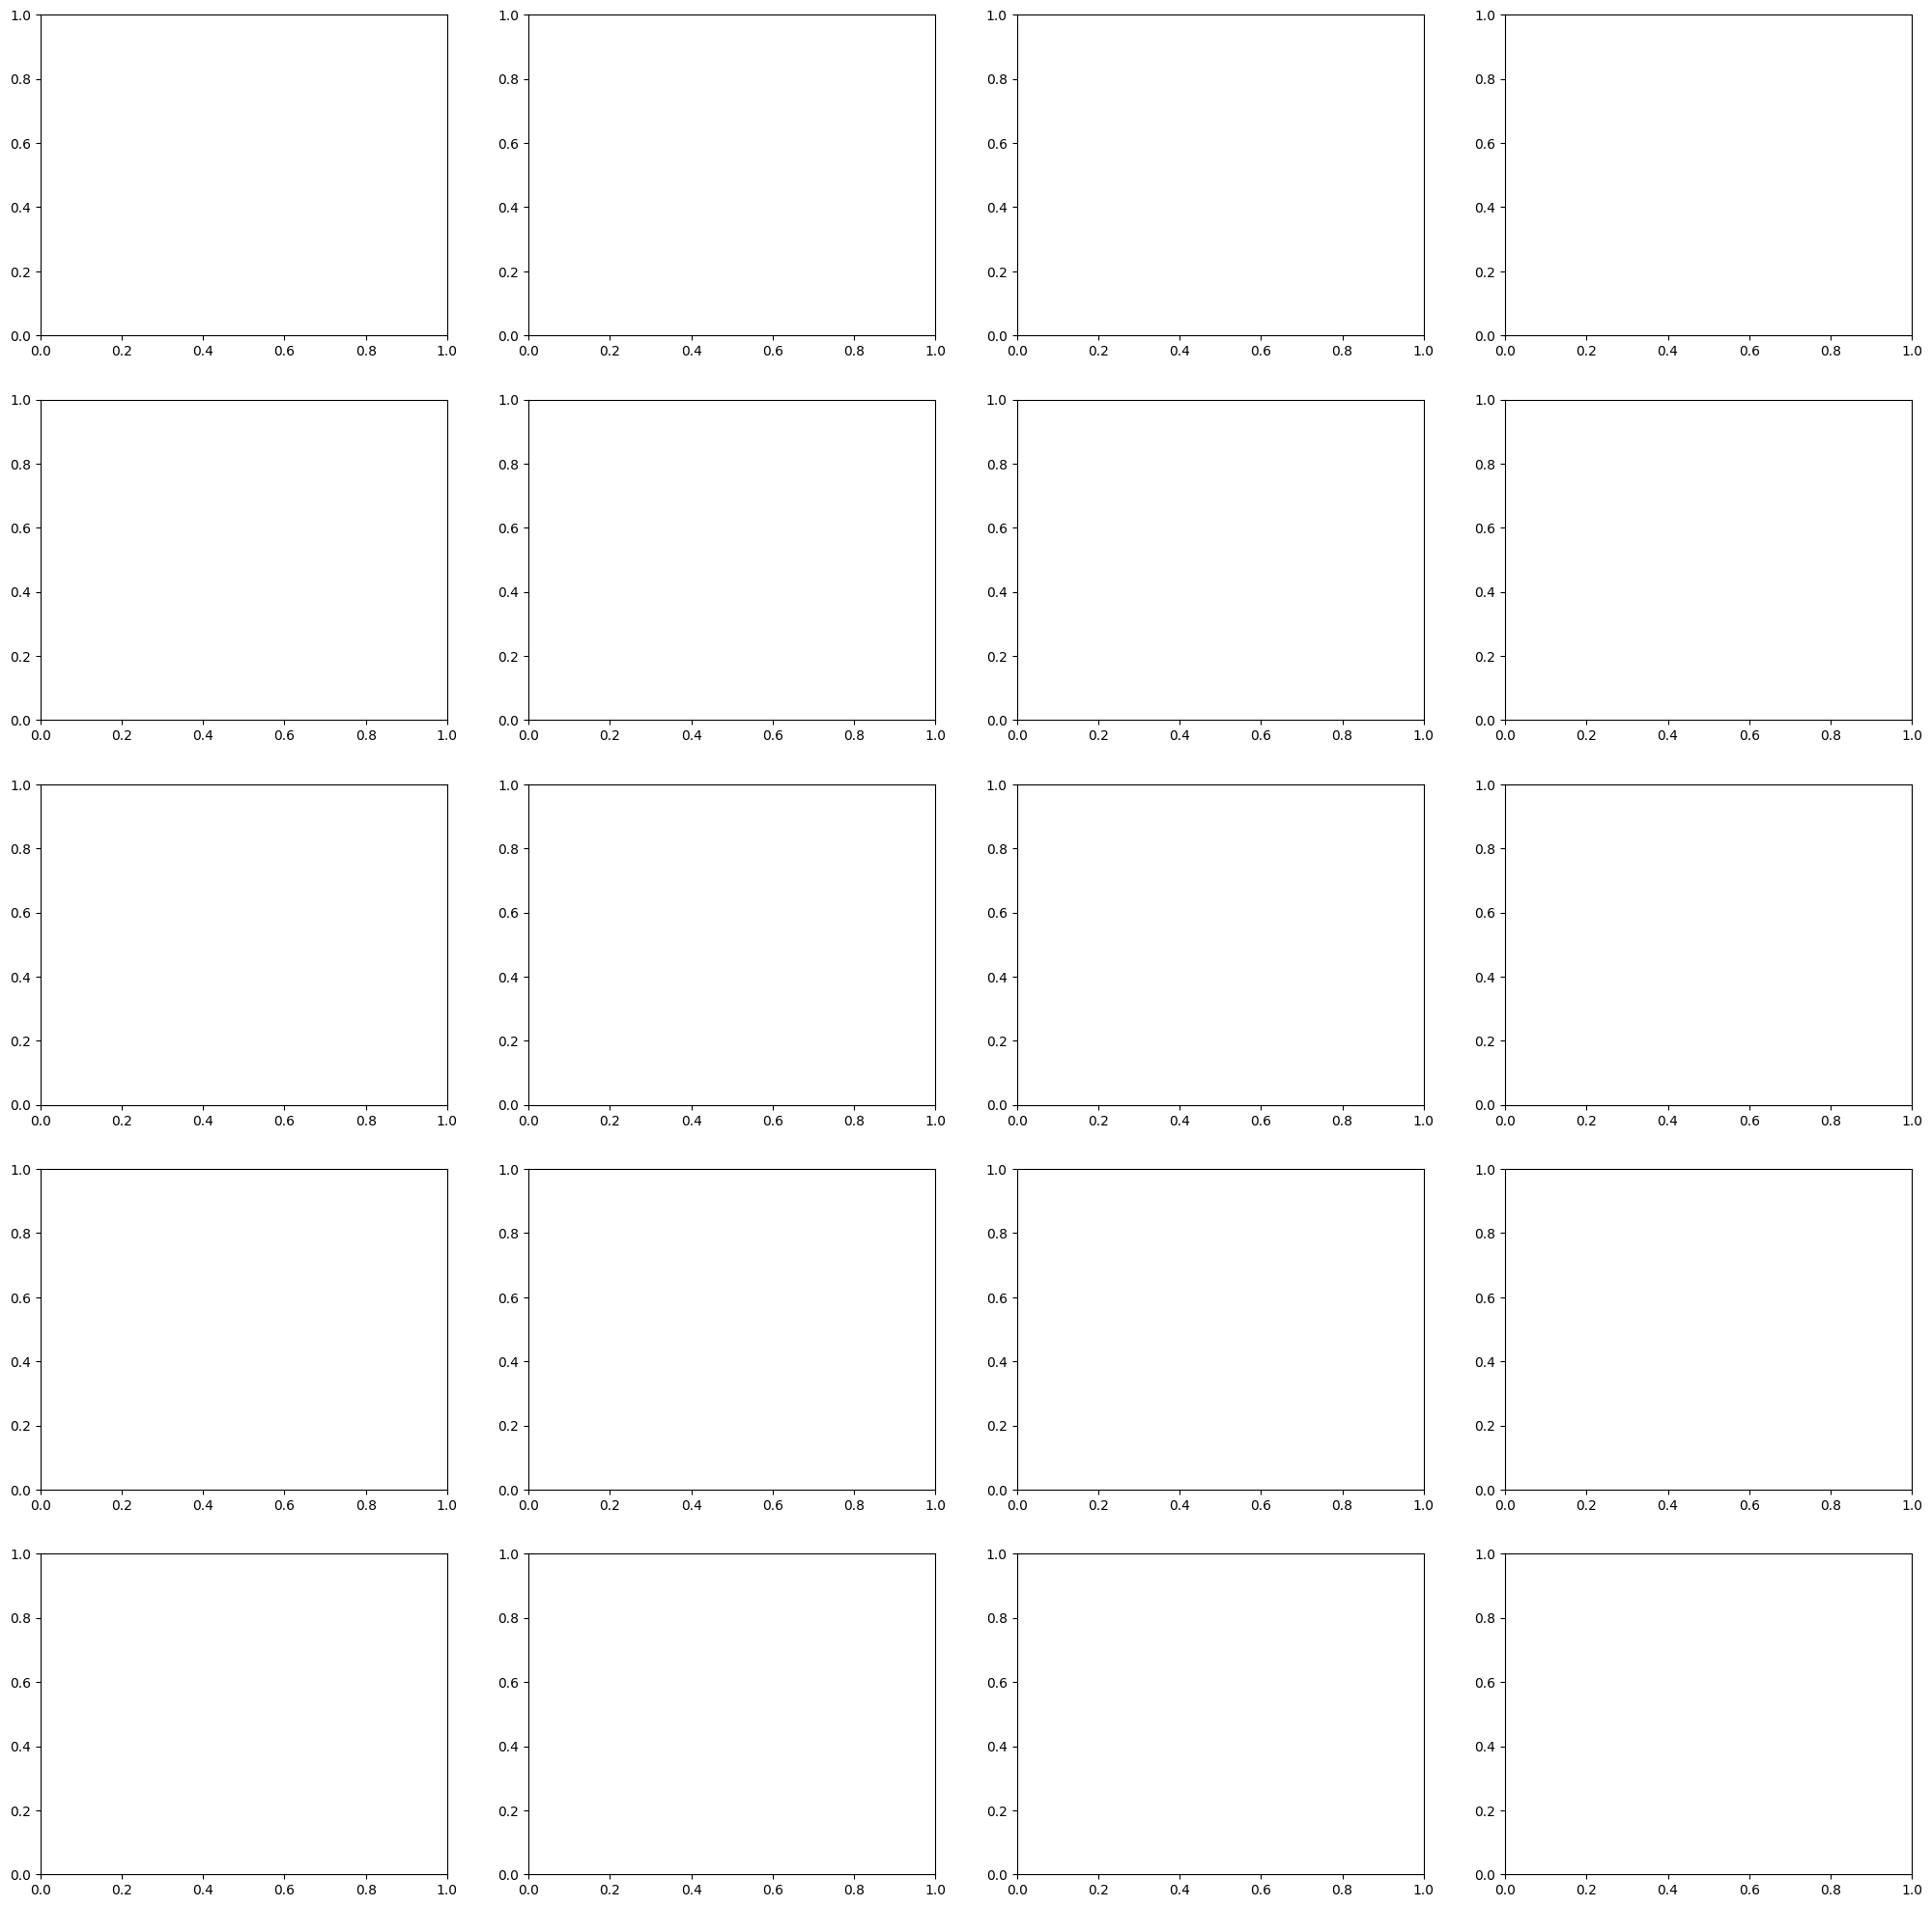

In [15]:
# time plots 
# sms and stuff is missing 

p_id = list(itertools.product(list(range(0,5)), list(range(0,4))))
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(25,25))

for i, col in enumerate(df.columns[1:]):
    df.plot(x='time', y=col, kind='line', ax=axs[p_id[i][0],p_id[i][1]])
    # # Set plot title and labels
    # axs[0,1].set_title('Line Plot of {}'.format(col))
    # axs[0,1].set_xlabel('datetime')
    # axs[0,1].set_ylabel(col)
plt.show()



conclusions: 
- get rid of time frame before march or sth -> too much missing data in all vars
- 

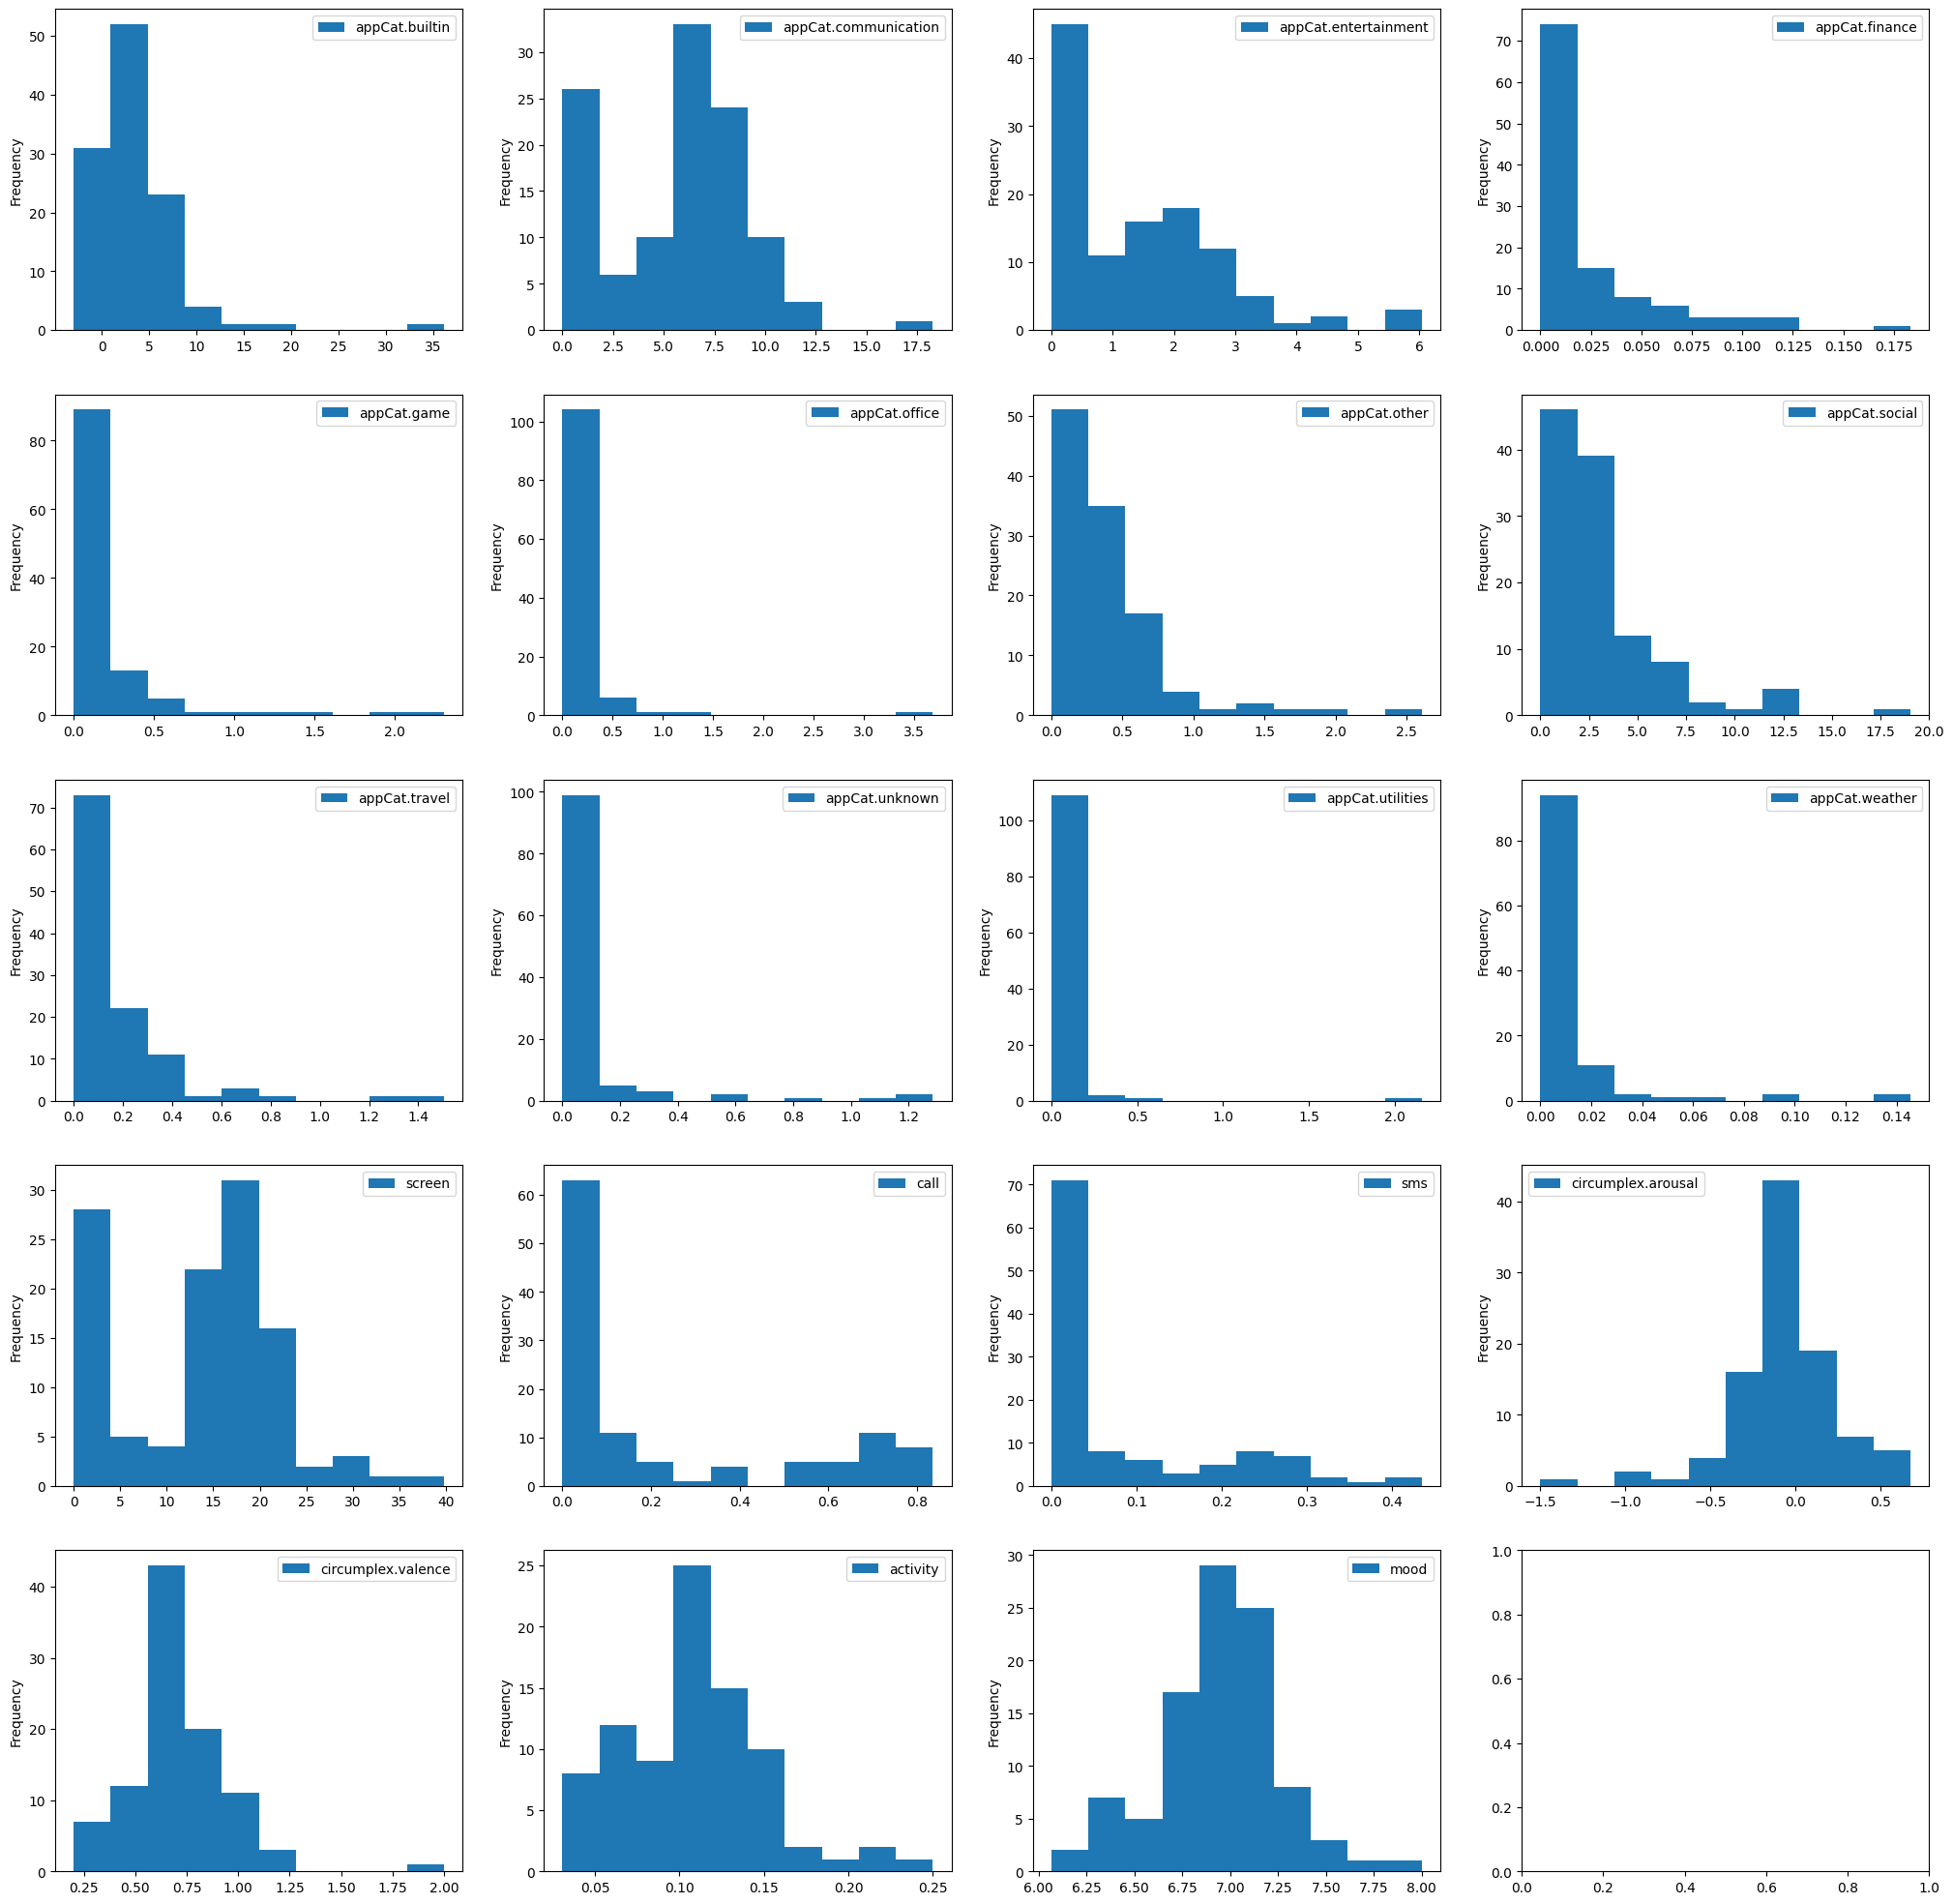

In [6]:
# distribution plots 

p_id = list(itertools.product(list(range(0,5)), list(range(0,4))))
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(25,25))

for i, col in enumerate(df.columns[1:]):

    df.plot(x='time', y=col, kind='hist', ax=axs[p_id[i][0],p_id[i][1]])
    # # Set plot title and labels
    # axs[0,1].set_title('Line Plot of {}'.format(col))
    # axs[0,1].set_xlabel('datetime')
    # axs[0,1].set_ylabel(col)
plt.show()

In [7]:
# variable specific table 